# Pulsar distance constrains via Pb dot

In [1]:
# Chiara Mingarelli, based on "accel" perl code by Paulo Freire

In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# physical constants for natural units c = G = 1
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [3]:
def kpc2sec(d): return d*1000*3.08568025e16/299792458

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
def find_nearest(array,value):
    #returns index of matching value in array
    idx = (np.abs(array-value)).argmin()
    return idx 

def sec2pc(sec):
    ans = sec*299792458/3.08568025e16
    return ans

def p_prec(fgw):
    """ 
    to what precision to we need to know pulsar distances to do GW
    phase matching, as a function of GW frequency?
    Answer in parsecs (pc). Input frequency in Hz.
    """
    deno = 2*pi*fgw
    ans = sec2pc(1/deno)
    return ans

In [4]:
print p_prec(1e-8)

0.154628632025


In [6]:
1/5/31556952

6.337747701362286e-09

In [7]:
lst = []

In [8]:
xaxis = range(10, 1001, 1)

In [9]:
for freq in xaxis:
    freq = freq/1e10
    lst.append(p_prec(freq))

In [10]:
xaxis = np.array(xaxis)/1e10

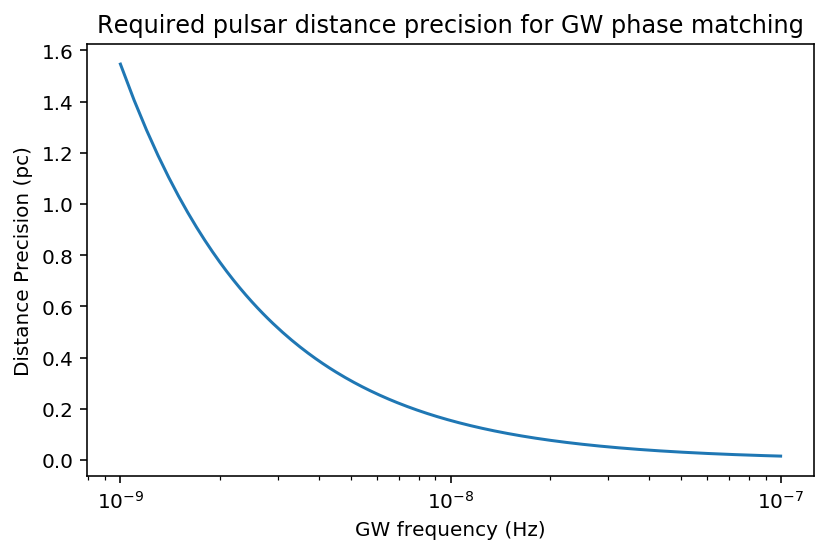

In [11]:
plt.semilogx(xaxis, lst)
plt.xlabel("GW frequency (Hz)")
plt.ylabel("Distance Precision (pc)") #\times 10^{-18}
plt.title("Required pulsar distance precision for GW phase matching")
plt.legend(loc=4)
plt.tight_layout()
plt.savefig("../figures/distances.pdf")



## Physical Quantities

In [12]:
year2sec = 31556952

In [15]:
# dkpc distance in kpc  # Grundahl, Stetson & Andersen 2002
tot_accel = []
distances = list(frange(0.01,10,.01))

ldeg = 80.808355 # galactic longitude in degrees, Goldsbury et al
bdeg = 54.281682 #1galactic latitude in degrees, Goldsbury et al
mumasyr = 8.55 # proper motion in mas/yur 

#measured parameters
p = 1/ 24.4289793809236 # period in sec
fdotobs = -1.62263e-17
pb = 8.6340050964 * 86400 
pdotobs = 2.71839191763874e-20
r0kpc = 8.34    # distance to galactic center in kpc, Reid et al 2014
thetakms = 240 # galactic rotation velocity, km/s, Reid et al 2014

b = bdeg*pi/180
l = ldeg*pi/180
r0 = kpc2sec(r0kpc)   # convert from kpc to lt-sec


#dsec = kpc2sec(dkpc)  # convert from kpc to lt-sec
theta = thetakms / 2.997925e5  # convert km/s to dimensionless
mu = mumasyr*1.536e-16 # convert mas/yr to rad/s

for dkpc in distances:
    # disk acceleration
    z = dkpc * sin(b)
    azc = - 1.08e-19 * (1.25*z/sqrt(z*z+0.0324)+0.58*z)
    zaccel = azc * sin(b)
    # differential rotation accceleration
    dsec = dkpc * 3.085e21 / 2.99792458e10
    beta=(dkpc/r0kpc)*cos(b)-cos(l)
    adotn = -cos(b)*(theta*theta/r0)*(cos(l)+beta/(sin(l)**2+beta**2))
    draccel = adotn
    # proper motion acceleration
    pmaccel = mu*mu*dsec
    totaccel = zaccel + draccel + pmaccel # total acceleration
    tot_accel.append(totaccel)

## Make Plot

In [16]:
fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 4,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.2,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [17]:
# Additional Pulsar Parameters

In [18]:
pbdot_obs = 2.95e-15 

In [19]:
y_param = pbdot_obs/pb # measured in pulsar

In [20]:
uncert = 67e-15/pb

In [21]:
y_param

3.954540000532877e-21

In [22]:
uncert

8.981497628328908e-20

In [23]:
tot_accel = np.array(tot_accel)

In [24]:
minLine = y_param - uncert
maxLine = y_param + uncert

In [25]:
#DM distances from NE2001
hminLine = 0.546
hTrue = 0.631
hmaxLine = 0.722

In [26]:
def t_Future(year):
    return (year*year2sec)**(-5/2)

In [27]:
Tfuture_5 = t_Future(5)
Tfuture_10 = t_Future(10)

In [28]:
fDel_5 = uncert/Tfuture_5
fDel_10 = uncert/Tfuture_10

In [29]:
FutureMinLine_5 = y_param - uncert/fDel_5
FutureMaxLine_5 = y_param + uncert/fDel_5

In [30]:
FutureMinLine_10 = y_param - uncert/fDel_10
FutureMaxLine_10 = y_param + uncert/fDel_10

In [31]:
.96*.8

0.768

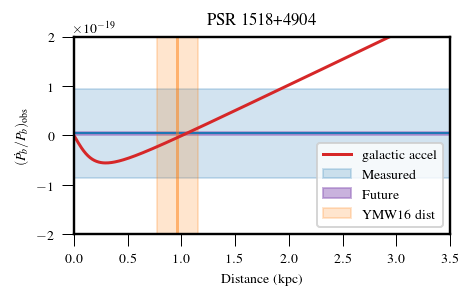

In [32]:
fig, ax1 = plt.subplots()
# Current Pb_dot/P
ax1.axhspan(minLine, maxLine,alpha=0.2,  color = 'C0', label = "Measured") # range Pb_dot/Pb
ax1.axhline(y_param,  color = 'C0', linestyle = "-", linewidth=1) # measured Pb_dot/Pb
# In 10 years
ax1.axhspan(FutureMinLine_5, FutureMaxLine_5 ,alpha=0.5,  color = 'C4', label = "Future") # range Pb_dot/Pb

ax1.axvline(0.96, alpha=0.5,  color = 'C1') # YMW16 DM model, no error given 
ax1.axvspan(.96*.8, .96*1.2, alpha=0.2,  color = 'C1', label = "YMW16 dist") # estimate 20% error


#ax1.axvspan(hminLine, hmaxLine, alpha=0.2,  color = 'C2', label = "NE2001 dist") # measured
#ax1.axvline(hTrue, alpha=1.0,  color = 'C2', linestyle ="-", linewidth=1) # measured
plt.plot(distances, tot_accel, label = "galactic accel", color = 'C3' ) # galactic potential 

plt.xlim(0,3.5)
plt.ylim(-2e-19,2e-19)
plt.xlabel("Distance (kpc)")
plt.ylabel(r"$(\dot P_b / P_b)_\mathrm{obs}$") #\times 10^{-18}
plt.title("PSR 1518+4904")
plt.legend(loc=4)
plt.tight_layout()
#plt.savefig("../figures/test_noNE2001.pdf")


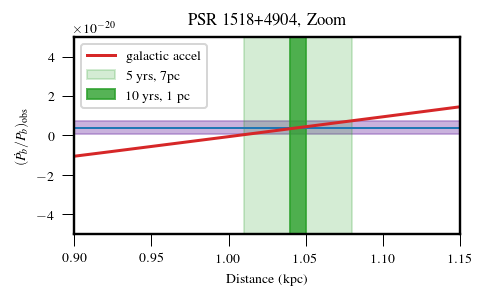

In [47]:
fig, ax1 = plt.subplots()
# Current Pb_dot/P
#ax1.axhspan(minLine, maxLine,alpha=0.2,  color = 'C0', label = "Measured") # range Pb_dot/Pb
ax1.axhline(y_param,  color = 'C0', linestyle = "-", linewidth=1) # measured Pb_dot/Pb
# In 5 years
ax1.axhspan(FutureMinLine_5, FutureMaxLine_5 ,alpha=0.5,  color = 'C4') # range Pb_dot/Pb
# In 10 years
#ax1.axhspan(FutureMinLine_10, FutureMaxLine_10 ,alpha=0.5,  color = 'C2', label = "10 years") # range Pb_dot/Pb

#ax1.axvline(0.96, alpha=0.5,  color = 'C1') # YMW16 DM model, no error given 
#ax1.axvspan(.96*.8, .96*1.2, alpha=0.2,  color = 'C1', label = "YMW16 dist") # estimate 20% error


ax1.axvspan(fiveYrMin, fiveYrMax, alpha=0.2,  color = 'C2', label = " 5 yrs, 7pc")
ax1.axvspan(tenYrMin, tenYrMax, alpha=0.8,  color = 'C2', label = " 10 yrs, 1 pc") # measured


#ax1.axvline(hTrue, alpha=1.0,  color = 'C2', linestyle ="-", linewidth=1) # measured
plt.plot(distances, tot_accel, label = "galactic accel", color = 'C3' ) # galactic potential 

plt.xlim(0.9,1.15)
plt.ylim(-0.5e-19,0.5e-19)
plt.xlabel("Distance (kpc)")
plt.ylabel(r"$(\dot P_b / P_b)_\mathrm{obs}$") #\times 10^{-18}
plt.title("PSR 1518+4904, Zoom")
plt.legend(loc=2)
plt.tight_layout()
#plt.savefig("../figures/test_noNE2001_ZoomW5and10yr.pdf")



In [ ]:
FutureMinLine_5

In [34]:
def find_nearest(array,value):
    #returns index of matching value in array
    idx = (np.abs(array-value)).argmin()
    return idx 

In [35]:
find_nearest(tot_accel,FutureMaxLine_5)

107

In [36]:
fiveYrMin = distances[100]

In [37]:
fiveYrMax = distances[107]

In [38]:
fiveYrMax

1.0800000000000007

In [39]:
abs(fiveYrMax-fiveYrMin)

0.07000000000000006

In [40]:
FutureMinLine_10

3.389261618682393e-21

In [41]:
FutureMaxLine_10

4.519818382383361e-21

In [42]:
find_nearest(tot_accel,FutureMaxLine_10)

104

In [43]:
find_nearest(tot_accel,FutureMinLine_10)

103

In [44]:
tenYrMin = distances[103]

In [45]:
tenYrMax = distances[104]

In [46]:
fiveYrMax

1.0800000000000007